# Problema de Particionamiento de un grafo en Componentes Conexas

## Problema

Dado un grafo general $G=(V, E)$ de $n$ nodos con peso determinado en sus arcos $d_{ij}$ para todo $\{i,j\}\in E$, particionar el grafo en $k$ componentes conexas, donde $V=V_1, V_2,..., V_j$ con $V_i \cap V_j=\emptyset \quad\forall j \in [k]$, con el objetivo de minimizar la distancia total. Todas estas componentes conexas deben tener incorporados a lo menos 2 nodos.


### Variables

$y_i^{c}=\left \{ \begin{matrix} 1, &\mbox{si }i\in V_c
\\ 0, &\mbox{otro }\end{matrix}\right.$

$x_{ij}^{c}=\left \{ \begin{matrix} 1, &\mbox{si los nodos } i, j \in V_c \mbox{ y además la arista } \{i,j\}\in E
\\ 0, &\mbox{otro }\end{matrix}\right.$

$f_{ij}^{c}=\left \{ \begin{matrix} 1, &\mbox{si los nodos } i, j \in V_c \mbox{ con la arista } \{i,j\}\notin E
\\ 0, &\mbox{otro }\end{matrix}\right.$

$z_{il}^{jc} \in \mathbb {Z}^{+}$ es la cantidad de flujo en el arco $\{i,l\}\in E$, en la componente $c$, que tiene como fuente el nodo $j$

### Modelo

\begin{align}
\min &\sum_{\{i,j\} \in E} d_{ij}\, x_{ij}^{c}\\
\text{s.a.} & \\
&\sum_{c\in [K]} y_i^{c} = 1, \qquad\qquad \forall i \in V,\\
&y_i^{c}+y_j^{c}-x_{ij}^{c} \,\,\leq 1, \quad \,\forall \{i,j\}\in E, \quad \forall c \in [k],\\
&y_i^{c}+y_j^{c}-2x_{ij}^{c} \geq 0, \quad \forall \{i,j\}\in E, \quad \forall c \in [k],\\
&y_i^{c}+y_j^{c}-f_{ij}^{c} \,\,\leq 1, \quad \,\forall \{i,j\}\notin E, \quad \forall c \in [k],\\
&y_i^{c}+y_j^{c}-2f_{ij}^{c} \geq 0, \quad \,\forall \{i,j\}\notin E, \quad \forall c \in [k],\\
&z_{il}^{jc}+z_{li}^{jc} \,\,\leq M\,x_{il}^{c}, \,\quad \,\forall \{i,j\}\in E, \quad \forall j \in V, \quad \forall c \in [k], \quad M>2(n-1)\\
&\sum_{\{i,j\} \in E} z_{il}^{jc} - \sum_{\{l,r\} \in E} z_{lr}^{jc}=\left \{ \begin{matrix} -\sum_{p \in V} f_{lp}^{c}, &\mbox{si } l=j\\ f_{jl}^{c}, &l \ne j\end{matrix}\right., \quad \forall j,l \in V,c\in[k] \\
&\sum_{i\in V} y_i^{c} \geq 2, \qquad\qquad \forall c \in [k],\\
&y_i^{c} \in \{0, 1\}, \qquad\, \forall i \in V, \qquad\,\,\,\, \forall c \in [k],\\
&x_{ij}^{c}\in \{0, 1\}, \qquad \forall \{i,j\}\in E, \quad \forall c \in [k],\\
&f_{ij}^{c}\in \{0, 1\}, \qquad \forall \{i,j\}\notin E, \quad \forall c \in [k],\\
&z_{il}^{jc} \in \mathbb {Z}^{+}, \qquad\quad \forall \{i,l\}\in E, \quad \forall j \in V, \quad \forall c \in [k].\\
\end{align}

## Grafo

In [1]:
# PAQUETES
# Gurobi Python Interface
# https://www.gurobi.com/documentation/8.1/quickstart_windows/py_python_interface
from   gurobipy   import *
import pandas as pd    # https://pandas.pydata.org/
import numpy  as np    # Numpy
import random as r
import time
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
# Aliases
seeds = np.random.seed

## Ingresando Manualmente el grafo

Name: 
Type: Graph
Number of nodes: 45
Number of edges: 147
Average degree:   6.5333
El costo del grafo es: 688
True


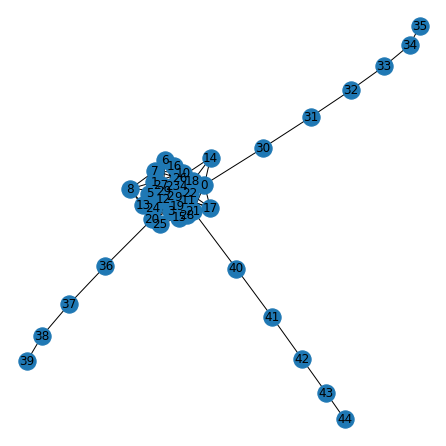

In [3]:
#INSTANCIA (45, 8) PRIMERA ITERACION F_L= 5
from scipy.stats import bernoulli 

def erdos_graph(n,p):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)
    return G 
n = 30;     # número de nodos
p = 0.3;    # probabilidad
seeds(49) 
G = erdos_graph(n,p)
G.add_edge(0,30)
G.add_edge(30,31)
G.add_edge(31,32)
G.add_edge(32,33)
G.add_edge(33,34)
G.add_edge(34,35)
G.add_edge(20,36)
G.add_edge(36,37)
G.add_edge(37,38)
G.add_edge(38,39)
G.add_edge(21,40)
G.add_edge(40,41)
G.add_edge(41,42)
G.add_edge(42,43)
G.add_edge(43,44)
V = G.nodes                                 # Conjunto de nodos
A = G.edges                                 # Conjunto de aristas
seeds(49)                                  # Fijamos la semilla de números aleatorios
W = np.random.randint(1,10, len(A))   # Creamos un vector de pesos aleatorios

for i, e in enumerate(A()):
    G[e[0]][e[1]]['w'] = W[i]               # Para corroborar: G[e[0]][e[1]]['w']
print(nx.info(G))
#print(nx.get_edge_attributes(G, 'w'))
costo = sum([ G[a[0]][a[1]]['w'] for a in G.edges])
print("El costo del grafo es:", costo)
print(nx.is_connected(G))
plt.figure(figsize=(6,6))
nx.draw(G, nx.spring_layout(G), with_labels=True)
plt.draw()

In [4]:
print(nx.is_connected(G))

True


In [5]:
#print(nx.get_edge_attributes(G, 'w'))

In [6]:
d = nx.get_edge_attributes(G, 'w')
B = [(j,i) for (i,j) in d.keys()]
NA = list(nx.non_edges(G))
A=list(G.edges())

### Información del grafo

In [7]:
# Compilar esta linea después de la linea anterior cuando ingresamos manualmente el grafo
V    = G.nodes
n = len(V)
M = 2*n;


In [8]:
print(V)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


### Información de la instancia

In [9]:
c = 8;     C = tuplelist(range(c));
γ = 5              # numero de nodos minimo

### Arcos entrantes y salientes del grafo
#### Compilar la siguiente linea ya sea si el grafo ingresa de forma aleatoria o manualmente

In [10]:
# crear diccionarios de arcos salientes / entrantes
salientes = {i : [(j,k) for (k,j) in A if j==i]+[(k,j) for (k,j) in A if k==i] for i in V}
entrantes = {i : [(j,k) for (j,k) in A if k==i]+[(j,k) for (k,j) in A if k==i] for i in V}


<div class="alert alert-block alert-info">
<b>Modelo</b>

1. $x:$ es un diccionario para almacenar la variable binaria $x_{ij}^{c}$,
2. $y:$ es un diccionario para almacenar la variable binaria $y_j^c$,
3. $f:$ es un diccionario para almacenar la variable binaria $f_{ij}^{c}$,
4. $z:$ es un diccionario para almacenar la variable tipo entero positivo $z_{il}^{jc}$
</div>

In [11]:
del mo

NameError: name 'mo' is not defined

In [ ]:
if 'mo' in globals():        mo.dispose();    disposeDefaultEnv();    del mo

In [15]:
# Modelo:
mo = Model()
x = {} # diccionario para la variable x
y = {} # diccionario para la variable y
f = {} # diccionario para la variable f
z = {} # diccionario para la variable z

mo.update()

Academic license - for non-commercial use only - expires 2021-09-02
Using license file C:\Users\academico\gurobi.lic


In [16]:
# esta variable es para el modelo relajado
#m = {} # diccionario para la variable x

### Creación de Variables

In [17]:
# Variables
start = time.time()
# x_i_j_k
x = mo.addVars(A, C, vtype = GRB.BINARY, name="x", lb = 0)

# y_i_k
y = mo.addVars(V, C, vtype = GRB.BINARY, name="y", lb = 0)
       
# f_i_j_k
f = mo.addVars(NA, C, vtype = GRB.BINARY, name="f", lb = 0)
       
# z_i_l_j_k
z = mo.addVars(A+B, V, C, vtype = GRB.INTEGER, name="z", lb = 0)
end = time.time()
print ('El tiempo que toma crear las variables es:', end-start)
mo.update()

El tiempo que toma crear las variables es: 1.022385597229004


In [18]:
# m_i_l_j_k
#m = mo.addVars(A+NA, C, vtype = GRB.BINARY, name="m", lb = 0)
#mo.update()

### Función objetivo

In [19]:
# Función objetivo
start = time.time()
obj=quicksum(x[i,j,k]*d[i,j] for (i,j) in A for k in range(c))
mo.setObjective(obj, GRB.MINIMIZE)
end = time.time()
print ('El tiempo que toma crear la función objetivo es:', end-start)
mo.update()

El tiempo que toma crear la función objetivo es: 0.018216371536254883


### Restricciones

<div class="alert alert-block alert-info">
<b>Restricción de pertenencia</b>
    
    
Esta restricción garantiza que cada nodo pertenezca exactamente a una sola componente conexa.
</div>

In [20]:
# Restricción de pertenencia
start = time.time() 
for i in V:
    r_name = "Res_pertenencia_" + str(i)
    mo.addConstr(quicksum(y[i,k] for k in range(c)) == 1, name = r_name)
end = time.time()
print ('El tiempo que toma crear estas restricciones son:', end-start)

El tiempo que toma crear estas restricciones son: 0.0


<div class="alert alert-block alert-info">
<b>Restricción de pertenencia de aristas</b> 
    
Esta restricción garantiza que si los nodos $i, j \in V_c \mbox{ y además la arista } \{i,j\}\in E$ entonces la 
arista $(i,j)$ también estará en la misma componente conexa que los nodos $i$ y $j$.

</div>

In [21]:
# Restricción de arristas que pertenecen a V_c
start = time.time()
cont1=0
for k in range(c):
    for (i,j) in A:
        cont1+=1
        w_name = "Res_arista_per" + str(cont1)
        mo.addConstr(y[i,k]+y[j,k]-x[i,j,k] <= 1, name = w_name)
cont2=0
for k in range(c):
    for (i,j) in A:
        cont2+=1
        t_name = "Res_arista2_per" + str(cont2)
        mo.addConstr(y[i,k]+y[j,k]-2*x[i,j,k] >= 0, name = t_name)

end = time.time()
print ('El tiempo que toma crear estas restricciones son:', end-start)

El tiempo que toma crear estas restricciones son: 0.05038094520568848


<div class="alert alert-block alert-info">
<b>Restricción de pertenencia de aristas que no están en el grafo</b> 
    
Esta restricción garantiza que si los nodos $i, j \in V_c \mbox{ y además la arista } \{i,j\}\notin E$ entonces se crea una arista articial $(i,j)$, la cual también estará en la misma componente conexa que los nodos $i$ y $j$.

</div>

In [22]:
# Restricción de aristas que no pertenecen a E
start = time.time()
cont3=0
for k in range(c):
    for (i,j) in NA:
        cont3+=1
        p_name = "Res_f_arista_per" + str(cont3)
        mo.addConstr(y[i,k]+y[j,k]-f[i,j,k] <= 1, name = p_name)

cont4=0
for k in range(c):
    for (i,j) in NA:
        cont4+=1
        p2_name = "Res_f_arista2_per" + str(cont4)
        mo.addConstr(y[i,k]+y[j,k]-2*f[i,j,k] >= 0, name = p2_name)
end = time.time()
print ('El tiempo que toma crear estas restricciones es:', end-start)
mo.update()

El tiempo que toma crear estas restricciones es: 0.17442011833190918


<div class="alert alert-block alert-info">
<b>Restricciones de flujo y cardinalidad</b> 
 
Estas restricciones garantizan que cada subgrafo será una componente conexa y además cada componente tenga al menos 2 nodos.
</div>

In [23]:
# Restricciones de Flujo:
# Restricción de flujo 1
start = time.time()
cont5=0
for k in range(c):
    for (i,l) in A:
        cont5+=1
        v_name = "Res_1_flujo" + str(cont5)
        sumaz = quicksum(z[i,l,j,k]+z[l,i,j,k] for j in V)
        mo.addConstr(sumaz <= M*x[i,l,k], name = v_name)
    #así estaba antes la restricción
    #for j in V:
     #   for (i,l) in A:
      #      cont5+=1
       #     v_name = "Res_1_flujo" + str(cont5)
        #    mo.addConstr(z[i,l,j,k]+z[l,i,j,k]<=M*x[i,l,k], name = v_name)
            
# Restricción de flujo 2
cont6=0
cont7=0
for k in range(c):
    for j in V:
        for l in V:
            if l==j:
                cont6+=1
                s_name = "Res_2_flujo" + str(cont6)
                sum1 = quicksum(z[i,l,j,k] for (i,l) in entrantes[j]) #arcos entrantes
                sum2 = quicksum(z[l,r,j,k] for (l,r) in salientes[j]) #arcos salientes
                suma = sum1-sum2
                tot1 = quicksum(f[l,p,k] for (m,p) in NA if m==l)
                #tot2 = quicksum(f[p,l,k] for p in range(n) if l>p and np.array(D)[p,l]==0)
                tot3 = tot1
                mo.addConstr(suma==-tot3, name = s_name)
            if j>l:
                continue;
            if j<l and (j,l) in NA:
                cont7+=1
                d_name = "Res_3_flujo" + str(cont7)
                term1 = quicksum(z[i,l,j,k] for (i,l) in entrantes[l])
                term2 = quicksum(z[l,r,j,k] for (l,r) in salientes[l])
                term  = term1 - term2
                tot   = f[j,l,k]
                mo.addConstr(term==tot, name = d_name)
            if j<l and (j,l) in A:
                cont7+=1
                d_name = "Res_3_flujo" + str(cont7)
                term1 = quicksum(z[i,l,j,k] for (i,l) in entrantes[l])
                term2 = quicksum(z[l,r,j,k] for (l,r) in salientes[l])
                term  = term1 - term2
                tot   = 0
                mo.addConstr(term==tot, name = d_name)

# Restricción de cardinalidad
for k in range(c):
    c_name = "Res_cardinalidad_" + str(k+1)
    mo.addConstr(quicksum(y[i,k] for i in V) >= γ, name = c_name)
    
# Restricción de corte para flujos en ciclos
#cont8=0
#for k in range(c):
 #   for j in V:
  #      cont8+=1
   #     v_name = "Res_corte_flujo_" + str(cont8)
    #    co = LinExpr()
     #   for (i,l) in A:
      #      co += (z[i,l,j,k]+z[l,i,j,k])
       # mo.addConstr(co<=M*n*y[j,k], name = v_name)
end = time.time()
print ('El tiempo que toma crear estas restricciones es:', end-start)

El tiempo que toma crear estas restricciones es: 0.768247127532959


### Restricciones adicionales al modelo

$$
\sum_{(i,j)\in E}x_{ij}^c \geq \sum_{i\in V} y_i^c-1, \forall c\in [k]. 
$$

<div class="alert alert-block alert-info">
<b>Restricción 1 para el problema relajado</b>
    
    
Esta restricción signifia que si hay $F_l$ nodos en una componente, deberían existir al menos $F_l$-1 arcos para que sea conexa..
</div>

In [24]:
# Restricción 1 del modelo relajado
#start = time.time() 
#for k in C:
 #   re_name = "Res_delRelajado_" + str(k)
  #  mo.addConstr(quicksum(x[i,j,k] for (i,j) in A)-quicksum(y[i,k] for i in V) >= -1, name = re_name)
#end = time.time()
#print ('El tiempo que toma crear estas restricciones son:', end-start)

#### Creamos el archivo lp

In [25]:
mo.update();
#mo.write("Problema_PGCC_V2.lp")

### Problema Relajado

In [26]:
#re = mo.relax();  mo.Params.LogFile="F1V2RELAJADO_Grafo180"; re.Params.TimeLimit = 60*60;  re.optimize()

#### Tiempo límite para resolver el modelo de 3600 segundos

In [27]:
mo.Params.Cuts = 0
mo.Params.TimeLimit = 60*60
mo.optimize()

Changed value of parameter Cuts to 0
   Prev: -1  Min: -1  Max: 3  Default: -1
Changed value of parameter TimeLimit to 3600.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 25349 rows, 114120 columns and 252264 nonzeros
Model fingerprint: 0xcc7e698a
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [1e+00, 9e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 136 rows and 52544 columns
Presolve time: 0.19s
Presolved: 25213 rows, 61576 columns, 199400 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Use crossover to convert LP symmetric solution to basic solution...
Crossover log...

   

In [28]:
obj_opt = mo.getObjective()
print(obj_opt.getValue())

0.0


Guardamos las variables del modelo en $s$

In [29]:
s=mo.getVars()

#### Impresión de las variables

In [30]:
for v in mo.getVars():
    if v.x > 1e-5:
        print ('%s %g' % (v.varName, v.x))

y[0,5] 0.833333
y[0,6] 0.166667
y[1,5] 0.166667
y[1,6] 0.833333
y[2,4] 0.666667
y[2,5] 0.166667
y[2,6] 0.166667
y[3,3] 0.333333
y[3,4] 0.333333
y[3,5] 0.166667
y[3,6] 0.166667
y[4,3] 0.666667
y[4,5] 0.166667
y[4,6] 0.166667
y[5,5] 0.166667
y[5,6] 0.166667
y[5,7] 0.666667
y[6,1] 0.333333
y[6,4] 0.333333
y[6,5] 0.166667
y[6,6] 0.166667
y[7,0] 0.666667
y[7,5] 0.166667
y[7,6] 0.166667
y[8,2] 0.5
y[8,4] 0.333333
y[8,5] 0.166667
y[9,1] 0.5
y[9,4] 0.333333
y[9,5] 0.166667
y[10,2] 0.333333
y[10,5] 0.166667
y[10,6] 0.166667
y[10,7] 0.333333
y[11,0] 0.333333
y[11,3] 0.333333
y[11,5] 0.166667
y[11,6] 0.166667
y[12,1] 0.5
y[12,4] 0.333333
y[12,5] 0.166667
y[13,0] 0.166667
y[13,4] 0.333333
y[13,5] 0.166667
y[13,7] 0.333333
y[14,0] 0.333333
y[14,2] 0.166667
y[14,4] 0.333333
y[14,5] 0.166667
y[15,2] 0.166667
y[15,4] 0.333333
y[15,5] 0.166667
y[15,7] 0.333333
y[16,1] 0.5
y[16,2] 0.166667
y[16,5] 0.166667
y[16,6] 0.166667
y[17,0] 0.333333
y[17,3] 0.333333
y[17,5] 0.166667
y[17,6] 0.166667
y[18,2] 0.333

## Funciones

In [ ]:
def Arcos_Salientes(A, V, i):
    salientes = {i : [(j,k) for (k,j) in A if j==i]+[(k,j) for (k,j) in A if k==i] for i in V}
    return salientes[i];

def Arcos_Entrantes(A, V, i):
    entrantes = {i : [(j,k) for (j,k) in A if k==i]+[(j,k) for (k,j) in A if k==i] for i in V}
    return entrantes[i]

def Arcos_Corte_W(A, V, W):
    y1=[];
    y=[];
    for i in W:
        y1=Arcos_Entrantes(A,V,i)
        for j in W:
            for (a,b) in y1:
                if (a,b)==(j,i):
                    y1.pop(y1.index((j,i)));   
        y=y+y1
    y=sorted(y);
    return y;
    
def Arcos_Internos_Corte(A, V, W):
    y=[];
    y2=[];
    y3=[];
    for i in W:
        y=y+Arcos_Entrantes(A,V,i)
    y2=Arcos_Corte_W(A, V, W)
    for a in y2:
        y.remove(a)
    for (m,v) in y:
        if m<v:
            y3.append((m,v))
    
    return y3;

#necesito los arcos internos del subgrafo con sus pesos respectivos
def Costo_Subgrafo(d,y):
    costo=sum(d[a] for a in y)
    return costo;

def Componentes(V,C,y):
    W=[[] for a in C]
    for k in C:
        for i in V:
            if y[i,k].x==1:
                W[k].append(i)
    return W

## Verificamos el resultado

<div class="alert alert-block alert-info">
<b>Modelo</b>

1. $W:$ es una lista de listas, cada sublista contiene los nodos de la componente conexa,
2. $ARCOMP:$ es una lista de listas, cada sublista contiene las aristas de la componente conexa, desde 0 a c-1,
3. $CosComp:$ es una lista que contiene los pesos de cada arco en cada componente conexa, desde 0 a c-1,
4. $C_{Total}:$ es la suma total de las distancias de las componentes conexas
</div>

In [ ]:
W=Componentes(V,C,y)
ARCOMP=[Arcos_Internos_Corte(A, V, W[k]) for k in C]
CosComp=[Costo_Subgrafo(d,ARCOMP[k]) for k in C]
C_Total=sum(CosComp)
print( "La suma total de las distancias es:", C_Total)

### Aristas de cada componente y sus nodos

In [ ]:
for k in C:
    print('Los nodos que se encuentran en la componente conexa {} son:'.format(k), W[k])
    print('Las aristas que se encuentran en la componente conexa {} son:'.format(k), ARCOMP[k])

### Verificamos si cada componente es conexa

In [ ]:
# Extraemos las componentes en F
import re
#verificamos si la k-particion tiene k componentes conexas
num_comp=0
for i in C:
    if nx.is_connected(G.subgraph(W[i]))==True:
        print("Subgrafo %g: " %num_comp ,W[i])
        num_comp+=1
if num_comp == c:
    print("Existen %g compoenetes conexas" %c)
    print("El valor Objetivo es:", mo.ObjVal)
else:
    print("Existen mas de %g componentes conexas" %c)

# OTROS

$$
\text{Restricción no Lineal, la cual convertiremos en lineal para insertarla al modelo}
$$

$$
\sum_{(i,j) \in E} x_{i,j}^c + \sum_{(i,j) \in E} f_{i,j}^c = \frac{1}{2} \left( \sum_{i\in V} y_i^c \right)  \left( -1 \,+ \sum_{i\in V} y_i^c  \right), \qquad \forall c\in [k]
$$

$$
\text{Restricción Lineal}
$$

$$
\sum_{(i,j)\in E}x_{ij}^c + \sum_{(i,j)\in E}f_{ij}^c =  \sum_{(i,j)\in E\,\uplus E^c} m_{ij}^c , \quad\forall c\in [k]. 
$$

$$
y_i^{c}+y_j^{c} \leq m_{ij}^{c} + 1 , \quad \,\forall \{i,j\}\in E \uplus E^c, \quad \forall c \in [k],
$$

$$
y_i^{c}+y_j^{c} \geq 2*m_{ij}^{c} , \quad \,\forall \{i,j\}\in E \uplus E^c, \quad \forall c \in [k],
$$

<div class="alert alert-block alert-info">
<b>Restricción 2 para el problema relajado</b>
    
    
Esta restricción signifia que, si hay $x_{i,j}^c$ aristas en una componente, deberían existir una cantidad exacta de $f_{i,j}^c$ en cada componente conexa
</div>

In [ ]:
#start = time.time()
#cont9=0
#for k in range(c):
 #   for (i,j) in A+NA:
  #      cont9+=1
   #     re2_name = "Res2_delRelajado" + str(cont9)
    #    mo.addConstr(y[i,k]+y[j,k]-m[i,j,k] <= 1, name = re2_name)
     #   re3_name = "Res3_delRelajado" + str(cont9)
      #  mo.addConstr(y[i,k]+y[j,k]-2*m[i,j,k]>= 0 , name = re3_name)
#end = time.time()
#print ('El tiempo que toma crear estas restricciones son:', end-start)

<div class="alert alert-block alert-info">
<b>Restricción para el problema relajado</b>
    
    
Esta restricción signifia que, si hay $x_{i,j}^c$ aristas en una componente, deberían existir una cantidad exacta de $f_{i,j}^c$ en cada componente conexa
</div>

In [ ]:
#Restricción 2 del modelo relajado
#start = time.time() 
#for k in C:
 #   rel_name = "Res2_delRelajado_" + str(k)
  #  mo.addConstr(quicksum(x[i,j,k] for (i,j) in A) + quicksum(f[i,j,k] for (i,j) in NA) == 
   #              quicksum(m[i,j,k] for (i,j) in A+NA), name = rel_name)
#end = time.time()
#print ('El tiempo que toma crear estas restricciones son:', end-start)

In [ ]:
# VERIFICAMOS SI EL GRAFO ES CONEXO:
# Python program to print connected  
# components in an undirected graph 
# https://www.geeksforgeeks.org/connected-components-in-an-undirected-graph/

class Graph: 
      
    # init function to declare class variables 
    def __init__(self,V): 
        self.V = V 
        self.adj = [[] for i in range(V)] 
  
    def DFSUtil(self, temp, v, visited): 
  
        # Mark the current vertex as visited 
        visited[v] = True
  
        # Store the vertex to list 
        temp.append(v) 
  
        # Repeat for all vertices adjacent 
        # to this vertex v 
        for i in self.adj[v]: 
            if visited[i] == False: 
                  
                # Update the list 
                temp = self.DFSUtil(temp, i, visited) 
        return temp 
  
    # method to add an undirected edge 
    def addEdge(self, v, w): 
        self.adj[v].append(w) 
        self.adj[w].append(v) 
  
    # Method to retrieve connected components 
    # in an undirected graph 
    def connectedComponents(self): 
        visited = [] 
        cc = [] 
        for i in range(self.V): 
            visited.append(False) 
        for v in range(self.V): 
            if visited[v] == False: 
                temp = [] 
                cc.append(self.DFSUtil(temp, v, visited)) 
        return cc 
  


In [ ]:
# Driver Code 
if __name__=="__main__": 
      
    # n vertices numbered from 0 to 4 
    g = Graph(n); #está creando nodos de 0 al n
    for k in C:
        for (i,j) in ARCOMP[k]:
            g.addEdge(i, j) 
        cc = g.connectedComponents()
    for k in C:
        cc[k]=sorted(cc[k])

In [ ]:
if (cc==sorted(W)):
    print("Cada componente si es conexa")
else:
    print("Existen mas de C componentes conexas")

## Construcción de un grafo conexo aleatorio

<div class="alert alert-block alert-info">
<b>Construcción de un grafo conexo aleatorio</b>
    
<i>Datos de entrada</i>
1. $n$ es el número de nodos del grafo,
2. $c$ es el número de componentes conexas,
3. $C$ indexa las componentes conexas,
4. $p$ controla la probabilidad del arco,
6. $M$ es el parámetro de linealización del modelo.
7. $d_0$ y $d_1$ son parámetros para determinar el rango donde está contenido el peso de las aristas.
</div>

In [ ]:
n = 100
M = 2*n
c = 6;     C = tuplelist(range(c))
p = 1-0.3;   d_0, d_1 = 1, 10

<div class="alert alert-block alert-info">
    
<i>Constructores y conjuntos</i>
1. $V$: es el conjunto de nodos, enumerados desde $1$ hasta $n+1$,
2. $A$: es una lista con los arcos del grafo de la forma (i,j) con i<j,
3. $d$: es un diccionario, donde la clave son los arcos en $A$ y el valor es la distancia,
4. $NA$: es una lista con los arcos que no están en el grafo, con los cuales el grafo sería completo,
5. $B$: es una lista con los arcos del grafo de la forma (i,j) con i>j, es decir en el otro sentido que en A,
6. $m$: es la cantidad de aristas en el grafo,

</div>

In [ ]:
V    = range(1, n+1)
Prob = np.random.random( (n,n) );             #np.random.seed(seed=50)
Prov = np.argwhere(np.triu(Prob, 2) >= p) + 1
A    = [(i,i+1) for i in range(1,n)];    A += [ (a[0],a[1]) for a in Prov ];    A = sorted(A)
m    = len(A)
Rand = np.random.randint(d_0, d_1+1, m)
d    = {A[i] : Rand[i] for i in range(m)}
NA   = []
Nrov = np.argwhere( (np.triu(Prob, 2) < p) * (np.triu(np.ones((n,n)), 2) == 1) ) +1
NA   = [ (a[0],a[1]) for a in Nrov ]
B = [(j,i) for (i,j) in A]
print('El número de nodos del grafo es:', format(n))
print('El número de aristas del grafo es:', format(m))
print('El número de componentes conexas que se quiere del grafo es:', format(c))

#### Restricciones del modelo relajado

In [ ]:
# Esta es otra forma de hacer las restricciones del modelo relajado pero toma full time
start = time.time()
cont9=0
for k in range(c):
    cont9+=1
    re2_name = "Res2_delRelajado" + str(cont9)
    mo.addConstrs((y[i,k]+y[j,k]-m[i,j,k]<=1 for (i,j) in A+NA), name=re2_name)
    re3_name = "Res3_delRelajado" + str(cont9)
    mo.addConstrs((y[i,k]-m[i,j,k]>=0 for (i,j) in A+NA), name=re3_name)
    mo.addConstrs((y[j,k]-m[i,j,k]>=0 for (i,j) in A+NA), name=re3_name)
    
end = time.time()
print ('El tiempo que toma crear estas restricciones son:', end-start)

$$
\sum_{i\in V} y_i^c(\sum_{i\in V} y_i^c)=\sum_{j\in V}\sum_{i\in V}y_i^c*y_j^c=\sum_{i\in V}(y_i^c)^2+\sum_{i\neq j}y_i^c*y_j^c 
$$

$$
m_{ij}^c=y_i^c*y_j^c \qquad m_{ij}^c\in \{0, 1\} \quad\forall \{i,j\}\in E \uplus E^c 
$$